# Chapter 1: Quadratic optimization

*Selected Topics in Mathematical Opimization: 2017-2018*

**Michiel Stock** ([email](michiel.stock@ugent.be))

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Motivation

Quadratic systems are important:
- Systems close to their maximum can closely be approximated by a quadratic system, studying the minimization of quadratic systems can teach us about minimization of general convex functions.
- Quadratic systems are important in their own right! Many statistical models, graph problems, molecular models etc. can be formulated as quadratic systems:
  - least-square minimization problems
  - inference using multivariate normal distributions
  - molecular modelling using spring-mass systems
  - signal recovery

## Warming up: one-dimensional quadratic systems

In the the scalar case, a quadratic function is given by

$$
f(x) = \frac{1}{2}px^2+qx +r\,,
$$

with $p>0$ (we will shortly see why).

Our optimization problem is given by:

$$
\min_x\,\frac{1}{2}px^2+qx +r\,.
$$

This can easily be solved by setting the first order derivative equal to zero:

$$
\frac{\mathrm{d}f(x)}{\mathrm{d}x} = px + q \\
px^\star+q = 0 \Leftrightarrow x^\star=\frac{-q}{p}\,.
$$

To show that this is the sole minimizer of $f(x)$, we have to prove that the second order derivative is positive in this point. This means that at that point the derivative of the function is increasing: a little to the left the function is increasing and a little to the right and the function is decreasing. We have
$$
\left.\frac{\mathrm{d}^2f(x)}{\mathrm{d}x^2}\right|_{x^\star} = p\,,
$$
so if $p>0$ then $x^\star$ is the minimizer of $f(x)$.


**Assignment 1**
Complete the code for solving the 1-D quadratic system. Use it to find the minimum of
$$
4x^2+8x + 2\,.
$$

In [1]:
def solve_1d_quadratic(p, q, r=0):
    """
    Finds the minimizer of an 1-D quadratic system, raises an error if there is
    no minimizer (p<0)

    Inputs:
        - p, q, r: the coefficients of the 1D quadratic system

    Output:
        - xstar: the minimizer
    """
    assert ...
    return ...

In [ ]:
# solve 1-D quadratic system here


## Towards $n$-dimensional quadratic systems

Let directly move from the one-dimensional case to the $n$-dimensional case. We will use vector notation
$$
\mathbf{x} = \begin{bmatrix}
       x_1 \\ \vdots \\ x_n
     \end{bmatrix} \in \mathbb{R}^n\,.
$$
A general $n$-dimensional linear system is given by:
$$
f(\mathbf{x}) =\frac{1}{2} \mathbf{x}^\top P \mathbf{x} + \mathbf{q}^\top\mathbf{x} + r\,,
$$
with $P$ an $n\times n$ symmetric matrix, $\mathbf{q}$ an $n$-dimensional vector and $r$ a scalar.

**Question 1**
Why is $P$ symmetric?

**Answer**:


So we want to solve the problem:
$$
\min_\mathbf{x}\,\frac{1}{2}\mathbf{x}^\top P \mathbf{x} + \mathbf{q}^\top\mathbf{x} + r\,.
$$

The concept of a derivative is extended towards higher dimensions using the *gradient* operator:
$$
\nabla_\mathbf{x} = \begin{bmatrix}
       \frac{\partial \, }{\partial x_1} \\ \vdots \\ \frac{\partial \, }{\partial x_n}
     \end{bmatrix}\,,
$$
so that the gradient of $f(\mathbf{x})$ is given by:
$$
\nabla_\mathbf{x} f(\mathbf{x}) = \begin{bmatrix}
       \frac{\partial f(\mathbf{x}) }{\partial x_1} \\ \vdots \\ \frac{\partial f(\mathbf{x}) }{\partial x_n}
     \end{bmatrix}\,.
$$
From now on, we will drop the subscript in the gradient when clear from context. For those not familiar to vector calculus, the most useful rules are given below. Here, $a, b$ and $c$ are scalars, $f$ and $g$ are arbitrary differentiable functions and $\mathbf{b}$ is a vector.

| rule | example     |
| :------------- | :------------- |
| linearity      | $\nabla_\mathbf{x}(a f(\mathbf{x}) +b g(\mathbf{x})) = a\nabla_\mathbf{x} f(\mathbf{x}) +b\nabla_\mathbf{x} g(\mathbf{x})$       |
| product rule | $\nabla_\mathbf{x}(f(\mathbf{x}) g(\mathbf{x})) = g(\mathbf{x})\nabla_\mathbf{x} f(\mathbf{x}) + f(\mathbf{x})\nabla_\mathbf{x} g(\mathbf{x})$|
|chain rule|$\nabla_\mathbf{x} f(g(\mathbf{x})) = \left.\frac{\partial f}{\partial g}\right|_{g(\mathbf{x})}\nabla_\mathbf{x} f(\mathbf{x})$|
| quadratic term | $\nabla_\mathbf{x} \left(\frac{1}{2}\mathbf{x}^\top A\mathbf{x}\right)= A\mathbf{x}$|
|linear term| $\nabla_\mathbf{x} (\mathbf{b}^\top\mathbf{x})=\mathbf{b}$|
|constant term |$\nabla_\mathbf{x} c = 0$ |

The gradient of the quadratic function is
$$
\nabla f(\mathbf{x})=P\mathbf{x} +\mathbf{q}\,.
$$
Setting this to zero gives
$$
\mathbf{x}^\star=-P^{-1}\mathbf{q}\,.
$$

> Even though the solution contains the inverse of a matrix, it is seldom a good idea to compute a matrix inverse. Instead, use a solver for the linear system $A\mathbf{x}=\mathbf{b}$ (numerically stable).

How do we know that $\mathbf{x}^\star$ is the minimizer of the quadratic system? For this we have to extend the concept of a second order derivative to $n$ dimensions. We define the *Hessian* as:
$$
\nabla^2 f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f(\mathbf{x})}{\partial {x_{1}^2}} & \frac{\partial^2 f(\mathbf{x})}{\partial x_1 x_2} & \ldots &  \frac{\partial^2 f(\mathbf{x})}{\partial x_1 x_n}\\
\frac{\partial^2 f(\mathbf{x})}{\partial x_1 x_2} & \frac{\partial^2 f(\mathbf{x})}{\partial {x_2}^2} & \ldots & \vdots \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f(\mathbf{x})}{\partial x_1 x_n} & \frac{\partial^2 f(\mathbf{x})}{\partial x_2 x_n} & \ldots & \frac{\partial^2 f(\mathbf{x})}{\partial x_n^2}
\end{bmatrix}\,.
$$
For the quadratic system, this boils down to
$$
\nabla^2 f(\mathbf{x}) = P\,.
$$
The condition for $\mathbf{x}^\star$ to be the minimizer of $f(\mathbf{x})$ is that the Hessian should be *positive-definite* in that point.

> A symmetric $n\times n$ matrix $A$ is positive-definite (in symbols: $A\succ0$), if for any vector $\mathbf{z}\in\mathbb{R}^n$
> $$
> \mathbf{z}^\top A \mathbf{z} > 0\,.
> $$

A matrix is positive-definite if (and only if) all its eigenvalues as positive.

A point $\mathbf{x}^\star$ at which the gradient vanishes is a minimizer if and only if
$$
\nabla^2 f(\mathbf{x})|_{\mathbf{x}^\star} \succ 0\,.
$$
So, for the quadratic problem, $x^\star$ is the unique minimizer iff $P\succ 0$. This means that along every direction $\mathbf{v}\in \mathbb{R}^n$ to project $\mathbf{x}$, the problem reduces to a one-dimensional quadratic function with a positive second-order constant:
$$
x_v = \mathbf{v}^\top \mathbf{x}\\
f'(x_v) = x_v (\mathbf{v}^\top P \mathbf{v}) x_v + (\mathbf{v}^\top \mathbf{q})x_v + r\,,
$$
where $\mathbf{v}^\top P \mathbf{v}>0$ if $P\succ 0$, which in turn implies that $f'(x_v)$ has a minimizer.

If $P\succ 0$, the quadratic system is a *convect* function with a single minimizer. In many problems, $P$ is positive-definite, so there is a well-defined solution. We will develop this further in Chapter 2.

**Assignment 2**

Complete the code for solving the $n$-D quadratic system. Use it to find the minimum of
$$
f(\mathbf{x}) = \mathbf{x}^\top\begin{bmatrix}4 & 1 \\ 1 & 2\end{bmatrix}\mathbf{x} + \begin{bmatrix}3 \\1\end{bmatrix}^\top\mathbf{x} + 12\,.
$$

In [4]:
def solve_nd_quadratic(P, q, r=0):
    """
    Finds the minimizer of an N-D quadratic system,
    raises an error if there is no minimizer
    (P is not positive-definite)

    Inputs:
        - P, q, r: the terms of the nD quadratic system

    Output:
        - xstar: the minimizer, an (n x 1) vector
    """
    assert np.all(np.linalg.eigvalsh(P) > 0)
    return ...  # to complete

In [5]:
# solve the system
xstar_exact = ...

**Question 2**

Consider $L_2$ regularized ridge regression:
$$
\min_\mathbf{x}\, (\mathbf{y} - B\mathbf{x})^\top(\mathbf{y} - B\mathbf{x}) + c\cdot \mathbf{x}^\top\mathbf{x}\,,
$$
with $c>0$. Write this in the standard form of a quadratic system and show that it is convex. Give the expression for the minimizer.

**Answer**:


## Time and memory complexity of exact solution

The exact solution for convex quadratic system hinges on solving a $n\times n$ linear system. Conventional solvers for linear systems have a time complexity of $\mathcal{O}(n^3)$. This is doable for problems of moderate size ($n<1000$), but becomes infeasible for large-scale problems (on a standard computer).

Storing an $n\times n$ matrix also has a memory requirement of $\mathcal{O}(n^2)$. When $n$ is too large, this cannot fit in main memory. In the remainder of this chapter, we will consider the case when $P$ is too large to work with, while matrix-vector products $P\mathbf{x}$ *can* be computed. Some examples of when such settings occur:
- $P=B^\top B$, with $B\in \mathbb{R}^{n\times p}$, with $p\ll n$.
- $P$ is a very sparse matrix.
- $P$ has a special structure so that $P\mathbf{x}$ can be computed on the fly, e.g. $P_{ij}=i^2j^3$.
- $P$ is a sparse block matrix (blocks can be loaded and processed independently).

## Descent methods

Instead of computing the solution of a convex quadratic system in one step, we will use *descent methods*. Here, a minimizing sequence $\mathbf{x}^{(k)},\, k=1,\dots$, where
$$
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} +t^{(k)}\Delta \mathbf{x}^{(k)}\,,
$$
with $t^{(k)}\geq 0$ called the *step size* (in machine learning often called *learning rate*) and $\Delta \mathbf{x}^{(k)}$ called the *search direction*. Proper descent methods have that
$$
f(\mathbf{x}^{(k+1)}) < f(\mathbf{x}^{(k)})\,,
$$
except when $\mathbf{x}^{(k)}$ is optimal. In this property to hold, the search direction should satisfy
$$
(\Delta \mathbf{x}^{(k)})^\top \nabla f(\mathbf{x}) < 0\,.
$$

![Descent and ascent step.](Figures/descent_step.png)

### General descent algorithm

Below is the general pseudocode of a general descent method:

> **given** a starting point $\mathbf{x}$
>
> **repeat**
>> 1. Determine descent direction $\Delta \mathbf{x}$
>> 2. *Line search*. Choose $t>0$.
>> 3. *Update*. $\mathbf{x}:=\mathbf{x} + t \Delta \mathbf{x}$.
>
> **until** stopping criterion is reached.

Usually, the convergence criterion is of the form
$$
||\nabla f(\mathbf{x})|| < \nu\,.
$$

The step size can be chosen in several ways:
- **exact**: $t=\arg\min_{s\geq 0}\, f(\mathbf{x}+s\Delta \mathbf{x})$.
- **approximate**: choose a $t$ that only approximately minimizes $f(\mathbf{x}+s\Delta \mathbf{x})$.
- **decaying**: choose some decaying series, e.g. $t = \frac{1}{\alpha+k}$.
- **constant**: a constant step size (often works fine in practice).

For quadratic systems we can compute the exact step size, as this amounts to a simple one-dimensional quadratic problem:
$$
t=\arg\min_{s\geq 0}\, \frac{1}{2}(\mathbf{x}+s\Delta \mathbf{x})^\top P (\mathbf{x}+s\Delta \mathbf{x}) + (\mathbf{x}+s\Delta \mathbf{x})^\top \mathbf{q} + r
$$
$$
t = \frac{-(\Delta\mathbf{x})^\top P \mathbf{x}-(\Delta\mathbf{x})^\top\mathbf{q}}{(\Delta\mathbf{x})^\top P \Delta\mathbf{x}}
$$

**Assignment 3**

Complete the code for the exact line search for quadratic systems.

In [7]:
def quadratic_exact_line_search(P, q, Dx, x):
    """
    Find the exact step size that minimized a quadratic system in
    a given point x for a given search direction Dx

    Inputs:
        - P, q: the terms of the nD quadratic system
        - x: starting point
        - Dx: search direction

    Output:
        - t: optimal step size
    """
    t = ...  # to complete
    return t

## Gradient descent

A natural choice for the search direction is the negative gradient:
$$
\Delta \mathbf{x} = - \nabla f(\mathbf{x})\,.
$$
Remember, for the quadratic system, the gradient was
$$
\nabla f(\mathbf{x})=P\mathbf{x} + \mathbf{q}\,,
$$
so
$$
\Delta \mathbf{x} = - P\mathbf{x} - \mathbf{q}\,.
$$


### Gradient descent algorithm for quadratic systems

> **given** a starting point $\mathbf{x}$
>
> **repeat**
>> 1. $\Delta \mathbf{x} := - P\mathbf{x} - \mathbf{q}$
>> 2. *Line search*. Choose optimal $t>0$.
>> 3. *Update*. $\mathbf{x}:=\mathbf{x} + t \Delta \mathbf{x}$.
>
> **until** stopping criterion is reached.

**Assignment 4**

Complete the code for the gradient descent algorithm. Solve the previous quadratic system and compare with the analytic solution. Start at $\mathbf{x}^{(0)}=[0,0]^\top$. How many steps do you need for the algorithm to converge? This can be obtained by setting `trace=True`.

In [ ]:
from quadratic import gradient_descent_quadratic

In [9]:
def gradient_descent_quadratic(P, q, x0, epsilon=1e-4, trace=False):
    """
    Gradient descent for quadratic systems

    Inputs:
        - P, q: the terms of the nD quadratic system
        - x0: starting point
        - trace: (bool) count number of steps?

    Outputs:
        - xstar: the found minimum
        - n_steps: number of steps before algorithm terminates (if trace=True)
    """
    x = x0  # initial value
    n_steps = 0
    while True:
        ...  # compute GD direction
        if ...
            break
        t = ...  # step size
        ...  # perform step
        n_steps += 1
    if trace: return x, n_steps
    else: return x

SyntaxError: invalid syntax (<ipython-input-9-008589b0ee59>, line 20)

### Convergence analysis

We can study the convergence of the gradient descent algorithm by using eigenvalue decomposition. The matrix $P$ can be written as:
$$
P = U\Lambda U^\top\,,
$$
with
- $\Lambda=\text{diag}(\lambda_1,\ldots,\lambda_n)$, a matrix with the eigenvalues on the diagonal (sorted from small to large).
- $U = [\mathbf{u}_1, \ldots, \mathbf{u}_n]$, a matrix with the corresponding eigenvectors.

Note that because $P\succ 0$, all eigenvalues are real and positive and all eigenvectors form a real orthonormal basis.

Consider the following linear transformation:
$$
\mathbf{z}^{(k)}= U^\top ( \mathbf{x}^{\star}-\mathbf{x}^{(k)})\,,
$$
which allows us to rewrite the error in closed-form:
$$
f(\mathbf{x}^{(k)}) - f(\mathbf{x}^\star) = \frac{1}{2}\sum_{i=1}^n (1-t\lambda_i)^{2k}\lambda_i[(\mathbf{U}_i)^\top(\mathbf{x}^{(0)}-\mathbf{x}^\star)]^2\,.
$$
Here, we see that:
1. The error decomposes in independent terms in the eigenspace.
2. The convergence of each term is determined by the *rate*: $|1-t\lambda_i|$. Convergence occurs as a geometric series.
3. The total convergence is determined by either the smallest or largest eigenvalue.
4. Optimal value for fixed step size is $t=\frac{1}{\lambda_1+\lambda_n}$.

![Illustration of eigendecomposition of the error during the iterations.](Figures/convergence_decomposition.png)

Furthermore, it can be shown that if we use an exact linesearch for the step size, the error $f(\mathbf{x}^{(k)}) - f(\mathbf{x}^\star)\leq \epsilon$ we need fewer than
$$
\frac{\log((f(\mathbf{x}^{(k)}) - f(\mathbf{x}^\star))/\epsilon)}{\log(1/c)}\,,
$$
with $c=1-\frac{\lambda_1}{\lambda_n}<1$. The quantity $\kappa=\frac{\lambda_n}{\lambda_1}$ is called the *condition number* and largely determines the convergence. We observe:
- The quality of the initial guess ($f(\mathbf{x}^{(k)}) - f(\mathbf{x}^\star$) has only a logarithmic impact on the number of steps required.
- Only a few extra steps are needed to decrease $\epsilon$ with one order of magnitude.
- If the condition number is large, then $\log(1/c)\approx 1/\kappa$. Large condition numbers require more steps.

![Illustration of the convergence bounds for different condition numbers.](Figures/convergence_bound.png)]

## Gradient descent with momentum

> *While finding the gradient of an objective function is a splendid idea, [descending] the gradient directly may not be.* ~ David J.C. MacKay

Even on simple quadratic problems as discussed here, gradient descent often takes a surprisingly large number of steps to converge. This is because the gradient does not necessarily points in the general direction of the minimum. For convex problems, we are only guaranteed that the gradient points in the half-space of the minimum - a rather weak guarantee! Many improvements on gradient descent have been devised. We will briefly discuss a small modification which can lead to a very large improvement in performance.

### Steps with memory

$$
\Delta \mathbf{x}^{(k+1)} = \beta \Delta \mathbf{x}^{(k)} - (1-\beta)\nabla f(\mathbf{x}^{(k)})\\
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + t^{(k)}\Delta \mathbf{x}^{(k+1)}\,,
$$
with $\beta\in[0,1]$.

### Gradient descent algorithm with momentum

> **given** a starting point $\mathbf{x}$, $\alpha$, $\beta$
>
> **initialize** $\Delta \mathbf{x}= \mathbf{0}$
>
> **repeat**
>> 1. $\Delta \mathbf{x} := \beta \Delta \mathbf{x}- (1-\beta)\nabla f(\mathbf{x})$ ($\nabla f(\mathbf{x}) = P\mathbf{x}$)
>> 2. *Line search*. Choose optimal $t>0$.
>> 3. *Update*. $\mathbf{x}:=\mathbf{x} + t \Delta \mathbf{x}$.
>
> **until** stopping criterion is reached.

**Assignment 5**

Complete the code for gradient descent with momentum. Use it find the solution for the above system, also starting at $\mathbf{x}=[0,0]^\top$. Set $\beta=0.1$. Do you see an improvement?

Compare both algorithms for minimizing system:

$$
f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^\top\begin{bmatrix}500 & 2 \\ 2 & 1\end{bmatrix}\mathbf{x} + \begin{bmatrix}-40 \\100 \end{bmatrix}^\top\mathbf{x} -5\,,
$$

at $\mathbf{x}_0= [0, 0, 0]^\top$. Does momentum increase the speed now?

In [8]:
def gradient_descent_quadratic_momentum(P, q, x0,
                                        beta=0.2, epsilon=1e-4,
                                        trace=False):
    """
    Gradient descent for quadratic systems with momentum

    Inputs:
        - P, q: the terms of the nD quadratic system
        - x0: starting point
        - beta: momentum parameter (default set to 0.2)
        - trace: (bool) count number of steps?

    Outputs:
        - xstar: the found minimum
        - n_steps: number of steps before algorithm terminates (if trace=True)
    """
    x = x0  # initial value
    n_steps = 0
    ...  # init Dx
    while True:
        ...  # compute gradient and search direction
        if ...  # complete
            break
        t = ...  # optimal step size
        ...  # descent step
        n_steps += 1
    if trace: return x, n_steps
    else: return x

SyntaxError: invalid syntax (<ipython-input-8-43cee971c942>, line 24)

## Conjugated gradient descent

Conjugated gradient descent is an important method for approximately minimizing quadratic systems. It converges much faster than simple gradient descent and does not have a hyperparameter as with momentum updates.

The main idea is that in every step the current search direction and all previous search directions are conjugate with respect to $P$, i.e.

$$
\Delta (\mathbf{x}^{(k)})^\top  P\Delta\mathbf{x}^{(l)}=0 \quad\forall  k> l\,.
$$

The interested reader is referred to '[An Introduction to the Conjugate Gradient Method Without the Agonizing Pain](http://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)' by Jonathan Richard Shewchuk for an in-depth overview.

## Exercise: signal recovery

As a practical example of minimizing quadratic systems, let us consider a simple signal recovery problem. Consider an $n$-dimensional real vector $\mathbf{x}=[x_1,\ldots,x_n]^\top$. Rather than observing this vector directly, we have $m$ noisy measurements at random indices (indices drawn randomly with replacement from $\{1,\ldots,n\}$): $\mathcal{O} = \{(i_j, y_j)\mid j=1,\ldots,m\}$. These measurements are stored in an $m$-dimensional vector $\mathbf{y}$. Can we recover $\mathbf{x}$ from $\mathbf{y}$?

If $m<n$, then we do not have a single measurement for every element of $\mathbf{x}$. Even if $m>n$, it is likely that some elements of $\mathbf{x}$ are not observed due to chance (for large $n$, if $n=m$ then about 37% of the elements will not be sampled). Clearly, recovering $\mathbf{x}$ from $\mathbf{y}$ is an impossible assumption if we do not make some assumptions, this seems an impossible problem in general.

If we assume that the different values of $\mathbf{x}$ are on a line, then we can make a *smoothness* assumption: elements of $\mathbf{x}$ for which the indices are close, likely will have similar values. This idea is expressed in the follow minimization problem:
$$
\min_\mathbf{x}\, \frac{1}{2}\sum_{(i_j, y_j)\in \mathcal{O}}(y_j-{x}_{i_j})^2 + \frac{C}{2} \mathbf{x}^\top K^{-1}\mathbf{x}\,,
$$
with $K^{-1}$ an inverse kernel (or covariance matrix) and $C$ a tuning hyperparameter. The matrix $K^{-1}$ encodes how the different elements of $\mathbf{x}$ are related, constructing such a matrix is a topic in machine learning (see course Predictive Modelling). For our purposes, we have chosen this matrix as such that elements should have values closes to each other. Hence, the minimization problem has two terms:
- a data fitting term to make sure that the recovered vector $\mathbf{x}$ matches the observations,
- a regularization term to ensure smoothness of the solution.
The parameter $C$ determines the trade-off between the two terms.

The problem can written purely in matrix notation by using the $(m\times n)$ bookkeeping matrix $R$ for which $R_{ij}=1$ if the the $j$-th element of $\mathbf{y}$ corresponds to the $i$-th element of $\mathbf{x}$ and $R_{ij}=1$ otherwise. Hence, the compact matrix form is:

$$
\min_\mathbf{x}\, \frac{1}{2}(\mathbf{y}-R\mathbf{x})^\top(\mathbf{y}-R\mathbf{x}) + \frac{C}{2} \mathbf{x}^\top K^{-1}\mathbf{x}\,.
$$

![](Figures/signal.png)

**assignments**

1. Write the minimization problem in the standard form.
2. Use the function `generate_noisy_measurements` to generate $m=100$ noisy measurements (standard deviation is 1, default) of a vector with dimensionality $n=1000$. Use the functions `make_connection_matrix` and `make_bookkeeping` to generate the associated matrices $K^{-1}$ and $L$. All are implemented in the module `signal_recovery`.
3. Use $C=1$, generate $\mathbf{x}^\star$ using the closed-form solution, using gradient descent and gradient descent with momentum. How many steps do the two descent methods need to converge? Use a vector of zeros as the initial point.
4. Minimize the system for values of $C=1\times 10^{-2}, 1\times 10^{-1}, 1, 10, 100$.  Use for momentum $\beta=0, 0.1, 0.2,\ldots, 0.9$. Make a table of the number of steps needed to reach convergence for the different values of $C$ and $\beta$. Make a plot with the different $\mathbf{x^\star}$ for different values of $C$. Note that the result should be (nearly) the same whether you use momentum or not, only the number of steps will differ.

**Problem in standard form**:



In [1]:
from signal_recovery import generate_noisy_measurements, make_connection_matrix, make_bookkeeping

In [2]:
# generate 100 noise measurements of vector of length 1000
y, I = generate_noisy_measurements(m=100, n=1000, sigma=1)

In [3]:
y[:10]  # measurement values

array([[ 2.12970775],
       [ 3.70944786],
       [-5.28393245],
       [ 2.45313002],
       [-0.6531807 ],
       [ 2.20109067],
       [ 0.63961899],
       [ 1.3176359 ],
       [ 0.19876413],
       [ 0.91111026]])

In [5]:
I[:10]  # positions of measurement (uniform with replacement)

array([570, 175, 819, 111, 255, 119, 332, 217, 622, 295])

In [34]:
K, Kinv = make_connection_matrix(n=1000)  # covariance matrix and its inverse

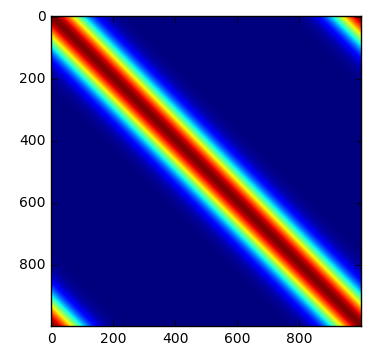

In [35]:
# heat map of K
# values of x that are closer to each other
# receive higher values (are expected to be similar)
plt.imshow(K)

In [36]:
# bookkeeping matrix
# gives at which points of the vector x the measurements
# of y correspond to
R = make_bookkeeping(I, n=1000)

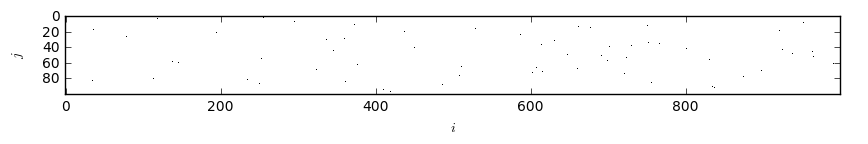

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(R, interpolation='nearest', cmap='binary')
ax.set_xlabel('$i$')
ax.set_ylabel('$j$')

## References

- Boyd, S. and Vandenberghe, L., '*[Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)*'. Cambridge University Press (2004)
- Goh, G. '[*Why Momentum really works*](https://distill.pub/2017/momentum/)' (2017)